### Install


In [2]:
%pip install pandas
%pip install scikit-learn
%pip install torch


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, Model, utils

2025-03-07 21:32:55.717092: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 21:32:56.943607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741372377.435342  381805 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741372377.518183  381805 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 21:32:58.721184: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# [Base Repo](https://git.codenrock.com/siam-ml-hack-1359/cnrprod1740766582-team-83332/zagruzka-koda-proekta-6529)

read this

# Data

[Train Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/data.zip) as Data/data/_ \
[Markup Train Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/markup_train.csv) as Data/markup_train.csv \
[High Qualiti Train Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/hq_markup_train.csv) as Data/hq_markup_train.csv \
[Test Data](https://storage.codenrock.com/companies/codenrock-13/contests/siam-ml-hack/validation%201.zip) as Data/validation 1/_ \

install all of this


In [4]:
hq_train_data_path = "./Data/hq_markup_train.csv"
lq_train_data_path = "./Data/markup_train.csv"


hq_train_data = pd.read_csv(hq_train_data_path)
lq_train_data = pd.read_csv(lq_train_data_path)


bin_features = ['Некачественное ГДИС',	'Влияние ствола скважины',	'Радиальный режим',	'Линейный режим',	'Билинейный режим',	'Сферический режим',	'Граница постоянного давления',	'Граница непроницаемый разлом']
value_features = [f + '_details' for f in bin_features[1:]]

# Конфигурация
SEQ_LENGTH = 256  # Длина временного ряда после интерполяции
N_FEATURES = 3  # Колонки Time, DeltaP, P_prime
BINARY_FEATURES = 8
REG_FEATURES = 7  # Все кроме первого признака

# Данные

X - временной ряд(находится в файле по имени `train_data['file_name'])`). Представляет из себя 3 значение(время, ΔP (атм) P′ (атм)) \
Y - 15 признаков, 8 биномиальные а 7 их численная характеристика на графике. \
Более подробно читайте в репе


In [5]:
hq_train_data

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
0,e9c7e07f-b723-4da3-918e-7dbcb360c830,department2,user5,0,1,1,0,0,0,0,1,2.082030,0.109087,NaN,NaN,NaN,NaN,4.647373
1,726565c9-e05b-4a28-9079-22d94f9bb9e2,department3,user4,0,1,1,1,0,0,0,0,2.714919,1.220888,1.353544,NaN,NaN,NaN,NaN
2,c2a4d43d-5a93-4c37-81b6-d4fdc5b0280b,department3,user5,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15e04219-9fa0-401d-8b42-833b71ccafb3,department3,user5,0,1,1,0,0,0,0,0,1.909838,1.569424,NaN,NaN,NaN,NaN,NaN
4,d43f459d-97fa-4ab0-bacc-43e2cb73e1b9,department1,user1,0,1,1,1,0,0,0,0,1.298287,1.140658,0.387881,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,a0448188-be5d-4ad6-929f-1870710e224b,department3,user4,0,1,1,0,0,1,0,0,2.127852,0.127861,NaN,NaN,0.774477,NaN,NaN
496,c295e7be-009c-4893-94c0-194d449077ed,department2,user5,0,1,1,0,0,0,1,0,3.084138,-0.304834,NaN,NaN,NaN,50.469566,NaN
497,ac06114e-e466-497a-a0b7-5166d784140e,department2,user5,0,1,0,0,0,0,0,1,0.009126,NaN,NaN,NaN,NaN,NaN,122.084111
498,0fd9d92c-a6d6-44c2-80b2-7f3cfcbea3da,department3,user5,0,1,1,0,1,0,1,0,2.328356,1.640163,NaN,1.291103,NaN,292.072213,NaN


In [6]:
lq_train_data

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
0,2b1db5db-a184-4223-ac58-2f7a416dbab8,department1,user1,0,1,0,0,1,0,0,0,2.346340,NaN,NaN,0.494178,NaN,NaN,NaN
1,680641f4-eaae-4dca-9338-d9285efbda88,department2,user1,1,0,0,1,1,0,0,0,NaN,NaN,1.517418,0.659840,NaN,NaN,NaN
2,01fe0501-8f06-4d23-9754-05744ae95a4c,department2,user1,0,1,0,0,0,0,0,0,0.356844,NaN,NaN,NaN,NaN,NaN,NaN
3,4ad441ba-50ab-4520-8296-173907044b88,department1,user1,0,1,1,0,0,0,0,0,0.059301,1.344549,NaN,NaN,NaN,NaN,NaN
4,488841e5-cee6-4807-81a0-cb4111777b0b,department2,user1,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45136,40efd674-ad49-4d43-ab06-7e23f61bf27f,department5,user14,0,1,1,0,0,0,0,0,1.149702,1.142090,NaN,NaN,NaN,NaN,NaN
45137,dcdc9a79-5b7f-4cc7-ac9b-cb90e7e73aeb,department5,user14,0,1,0,0,0,0,0,0,4.855800,NaN,NaN,NaN,NaN,NaN,NaN
45138,7b895820-834b-428f-99d6-1995531eb999,department5,user14,0,1,0,0,0,0,0,0,5.263520,NaN,NaN,NaN,NaN,NaN,NaN
45139,f8b981e9-d4c1-4180-b63e-41bf2b972166,department5,user14,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

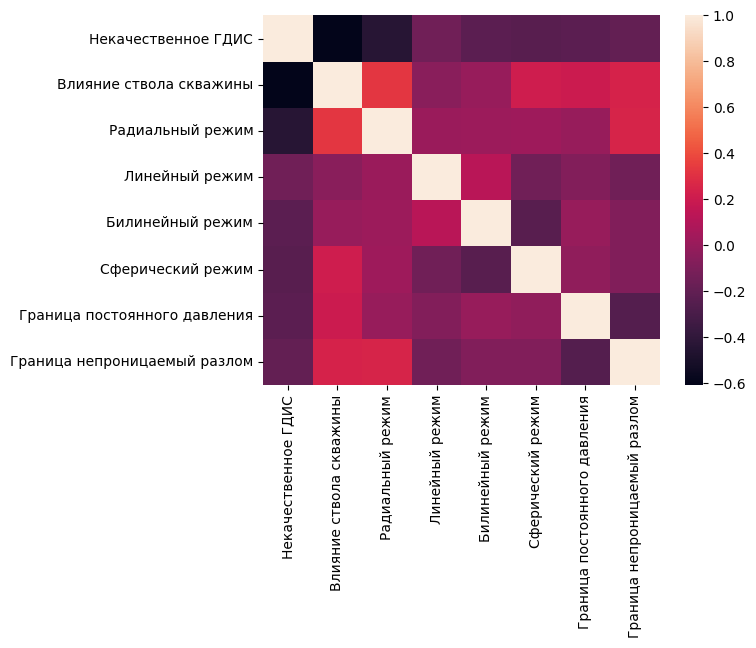

In [7]:
bin_corr = hq_train_data[bin_features].corr()
sns.heatmap(bin_corr,
            xticklabels=bin_corr.columns.values,
            yticklabels=bin_corr.columns.values)

<Axes: >

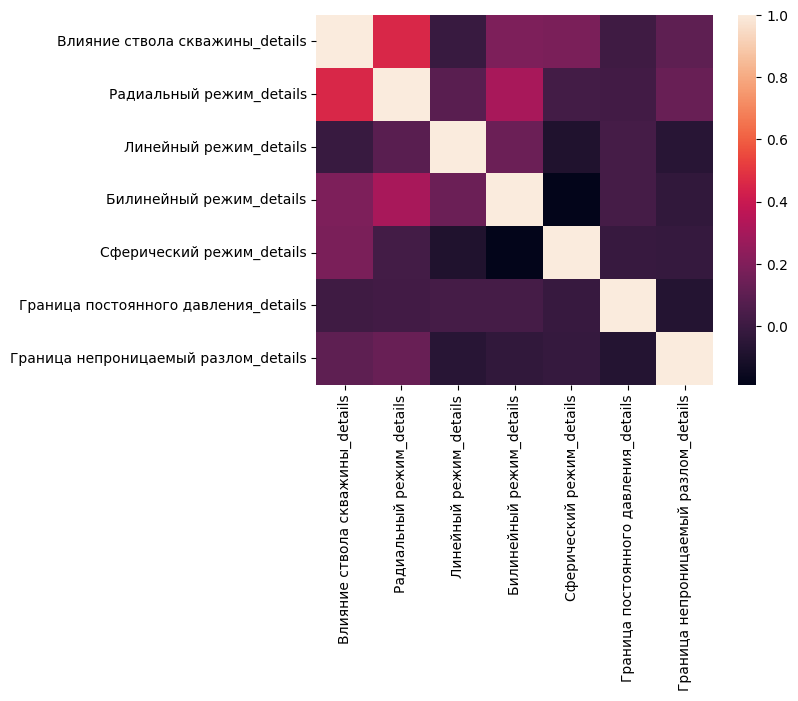

In [8]:

bin_corr = hq_train_data[value_features].fillna(-1).corr()
sns.heatmap(bin_corr,
            xticklabels=bin_corr.columns.values,
            yticklabels=bin_corr.columns.values)

In [9]:
def get_train_data(file_name: str, train=True) -> pd.DataFrame | None:
    """
    Загружает данные из файла с указанным UUID в DataFrame

    Параметры:
    uuid (str): Идентификатор файла
    data_dir (str): Путь к папке с данными (по умолчанию 'data')

    Возвращает:
    pd.DataFrame: DataFrame с колонками ['Time', 'DeltaP', 'P_prime']
    или None если файл не найден
    """
    if train:
        file_path = os.path.join("Data/data", file_name)
    else:
        file_path = os.path.join("Data/validation 1", file_name)
    try:
        df = pd.read_csv(
            file_path,
            sep="\t",
            header=None,
            names=["Time", "DeltaP", "P_prime"],
            dtype={"Time": "float32", "DeltaP": "float32", "P_prime": "float32"},
            engine="c",
        )
        return df
    except FileNotFoundError as x:
        print(f"File not found in path:\t {file_path}\n" + x)
        return None

def get_train_data_from_loc(loc:pd.Series, train=True)->pd.DataFrame | None:
    return get_train_data(loc['file_name'])

# print(get_train_data('e9c7e07f-b723-4da3-918e-7dbcb360c830')) # work
# print(get_train_data_from_loc(hq_train_data.iloc[1])) # work

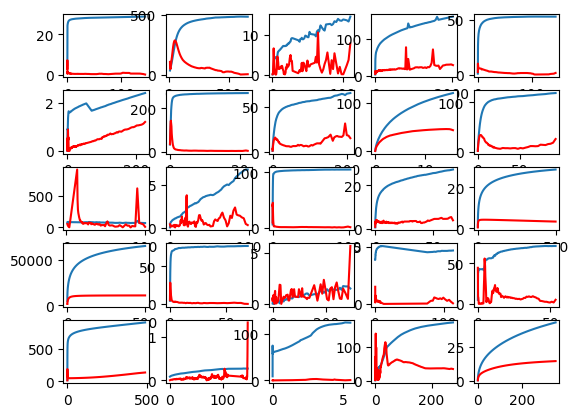

In [10]:
# Show some time series


subplot = (5, 5)
random_rows = hq_train_data.sample(n=subplot[0] * subplot[1], random_state=42)
series = [get_train_data_from_loc(d) for d in random_rows.iloc] 
for i, v in enumerate(series):
    plt.subplot(*subplot, i+1)
    plt.plot(v['Time'], v['DeltaP'])
    plt.plot(v['Time'], v['P_prime'], color='r')
plt.show()

In [11]:
# is each series is same length?
random_rows = hq_train_data.sample(n=3, random_state=42)
series = [get_train_data_from_loc(d) for d in random_rows.iloc] 
for s in series:
    print(s)
    print(s['Time'].describe())
# No need to standardize

           Time     DeltaP   P_prime
0      0.002778   4.789663  3.107884
1      0.005556   6.943874  6.343817
2      0.008333  10.283549  5.104697
3      0.011111  11.112785  4.850453
4      0.013889  12.535733  6.678874
..          ...        ...       ...
331  131.455551  28.683897  0.592375
332  134.488892  28.694868  0.592987
333  137.591660  28.709370  0.467822
334  140.766663  28.720343  0.365373
335  144.013885  28.729748  0.149852

[336 rows x 3 columns]
count    336.000000
mean      18.955341
std       32.053493
min        0.002778
25%        0.411111
50%        3.105556
75%       21.288888
max      144.013885
Name: Time, dtype: float64
           Time      DeltaP     P_prime
0      9.200314   37.626522  108.884567
1      9.833647   40.956516   60.519806
2     11.300314   50.946507   55.195992
3     11.866981   51.821541   54.617664
4     12.533647   53.814678   58.250004
..          ...         ...         ...
122  558.550293  482.776489   16.193865
123  571.450317  483.3112

### Временные ряды представлены в разном формате, с разной длинной и распределением
#### Попробуим их стандартизировать что бы потом обучит модельку

In [12]:
def standardize_series(original_df:pd.DataFrame, n_points:int=256)->pd.DataFrame:
    # Нормализация временной оси к диапазону [0, 1]
    time_normalized = (original_df['Time'] - original_df['Time'].min()) / (original_df['Time'].max() - original_df['Time'].min())
    
    # Создание новой равномерной временной сетки
    new_time = np.linspace(0, 1, n_points)
    
    # Интерполяция для каждой колонки
    interpolated_data = {}
    for column in ['DeltaP', 'P_prime']:
        interp_fn = interp1d(time_normalized, 
                            original_df[column], 
                            kind='linear',  # Можно изменить на 'quadratic' или 'cubic'
                            fill_value='extrapolate')
        interpolated_data[column] = interp_fn(new_time)
    
    # Создание нового датафрейма
    new_df = pd.DataFrame({
        'Time': np.linspace(original_df['Time'].min(), 
                          original_df['Time'].max(), 
                          n_points),
        'DeltaP': interpolated_data['DeltaP'],
        'P_prime': interpolated_data['P_prime']
    })
    
    return new_df

for s in series:
    ss = standardize_series(s)
    # print(ss)
    print(ss)

def get_train_s_data_from_loc(loc):
    return standardize_series(get_train_data_from_loc(loc))

           Time     DeltaP   P_prime
0      0.002778   4.789663  3.107884
1      0.567527  24.980109  1.012797
2      1.132277  25.760610  1.199878
3      1.697026  26.229177  1.112043
4      2.261776  26.516039  0.937539
..          ...        ...       ...
251  141.754888  28.723205  0.299784
252  142.319637  28.724841  0.262301
253  142.884387  28.726476  0.224818
254  143.449136  28.728112  0.187335
255  144.013885  28.729748  0.149852

[256 rows x 3 columns]
           Time      DeltaP     P_prime
0      9.200314   37.626522  108.884567
1     11.749791   51.640579   54.737266
2     14.299268   61.393202   65.721183
3     16.848745   72.349074   82.160665
4     19.398222   84.013100  103.394756
..          ...         ...         ...
251  649.119047  483.121211    6.548351
252  651.668524  483.071484    6.651161
253  654.218002  483.021757    6.753970
254  656.767479  482.972030    6.856780
255  659.316956  482.922302    6.959589

[256 rows x 3 columns]
           Time     DeltaP  

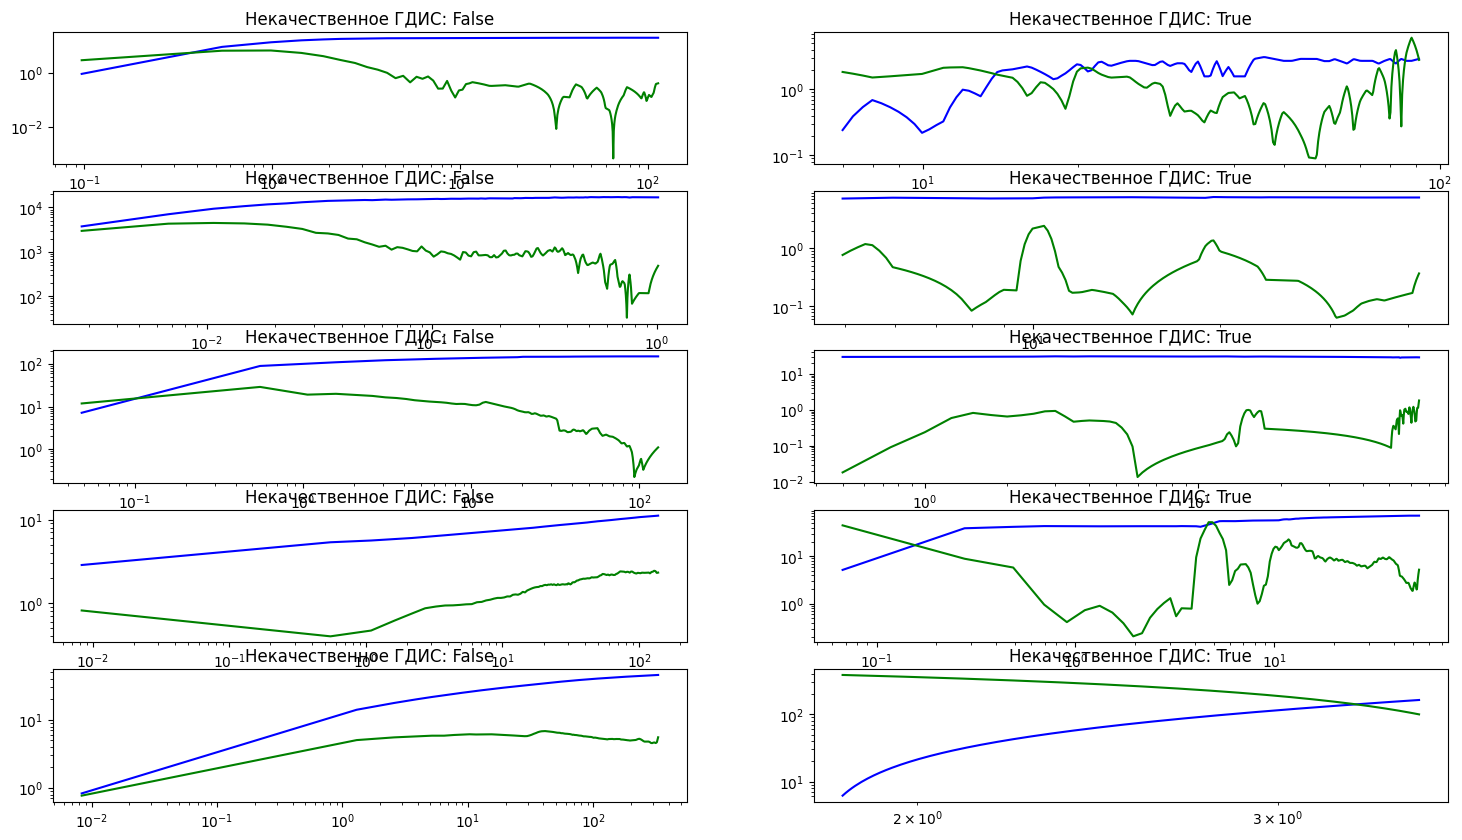

In [19]:
random_rows = hq_train_data.sample(n=400, random_state=122)
series = [get_train_data_from_loc(d) for d in random_rows.iloc] 

fig, ax = plt.subplots(5, 2, figsize = (18, 10) )
hq_train_data_t = random_rows[['file_name', 'Некачественное ГДИС']]
target0 = hq_train_data_t[hq_train_data_t['Некачественное ГДИС'] == 0]
target1 = hq_train_data_t[hq_train_data_t['Некачественное ГДИС'] == 1]
for i, v in enumerate(target0.iloc):
    if i > 4:
        break
    ss = standardize_series(get_train_data_from_loc(v))
    ax[i, 0].loglog(ss['Time'], ss['DeltaP'], color='b')
    ax[i, 0].loglog(ss['Time'], ss['P_prime'], color='g')
    ax[i, 0].set_title('Некачественное ГДИС: False')

for i, v in enumerate(target1.iloc):
    if i > 4:
        break
    ss = standardize_series(get_train_data_from_loc(v))
    ax[i, 1].loglog(ss['Time'], ss['DeltaP'], color='b')
    ax[i, 1].loglog(ss['Time'], ss['P_prime'], color='g')
    ax[i, 1].set_title('Некачественное ГДИС: True')
plt.show()


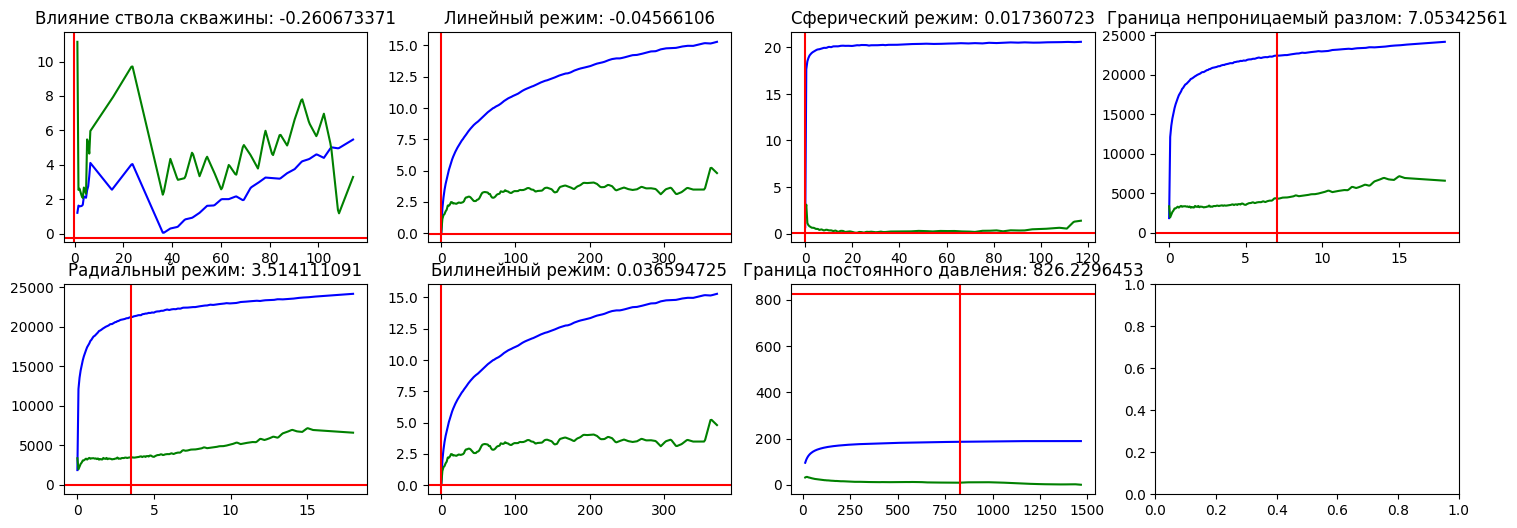

In [14]:
# for all target show where it is true
random_rows = hq_train_data.sample(n=100, random_state=48)
series = [get_train_data_from_loc(d) for d in random_rows.iloc] 

fig, ax = plt.subplots(2, 4, figsize= (18, 6))
hq_train_data_t = random_rows.drop(["department_name", "user_name"], axis=1)
for i, t in enumerate(hq_train_data_t.columns[2:9]):
    target = hq_train_data_t[['file_name', t, t+'_details']].dropna().iloc[0]
    ss = standardize_series(get_train_data_from_loc(target))
    ii = (i%2, i//2)
    ax[ii].plot(ss['Time'], ss['DeltaP'], color='b')
    ax[ii].plot(ss['Time'], ss['P_prime'], color='g')
    ax[ii].axvline(x=target[t+'_details'], color='r')
    ax[ii].axhline(y=target[t+'_details'], color='r')
    ax[ii].set_title(f'{t}: {target[t+'_details']}')


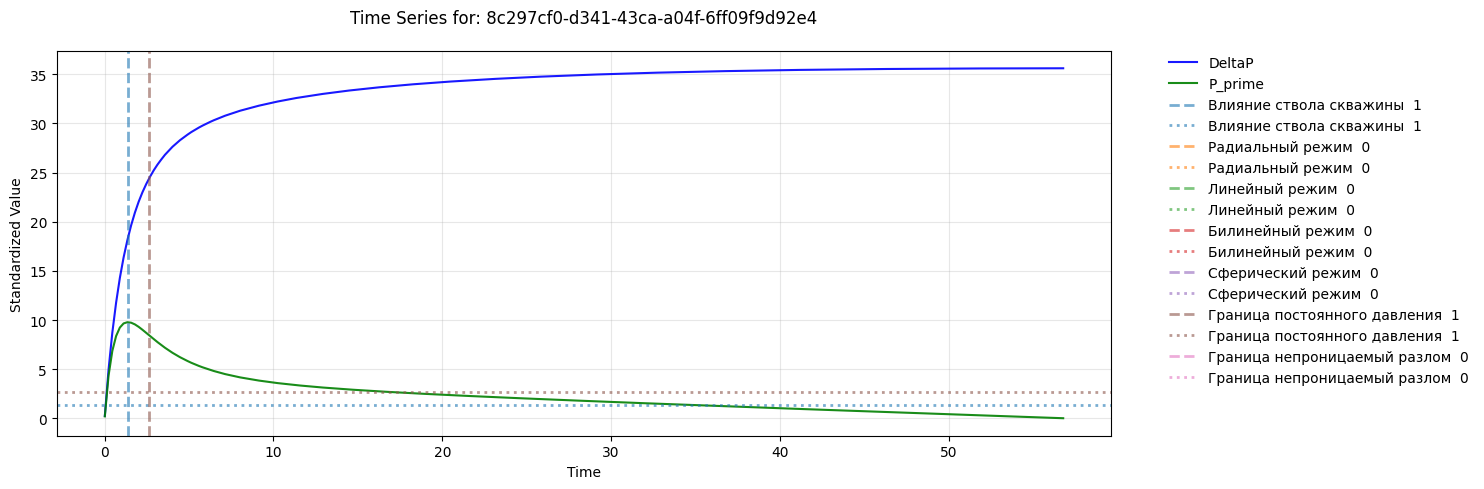

In [15]:
# show all target lines(if have) in one series
single_case = hq_train_data.sample(n=1, random_state=78).iloc[0]

# Получаем и стандартизируем данные
raw_series = get_train_data_from_loc(single_case)
standardized_series = standardize_series(raw_series)

# Создаем график
fig, ax = plt.subplots(figsize=(15, 5))

# Рисуем временные ряды
ax.plot(standardized_series['Time'], standardized_series['DeltaP'], 
        color='b', alpha=0.9, label='DeltaP')
ax.plot(standardized_series['Time'], standardized_series['P_prime'], 
        color='g', alpha=0.9, label='P_prime')

# Определяем целевые признаки (исключая служебные колонки)
targets = [col for col in single_case.index 
          if not col.endswith('_details') 
          and col not in ['file_name', 'department_name', 'user_name']][1:]

# Создаем палитру цветов
colors = plt.cm.tab10.colors

# Рисуем линии для каждого признака
for i, target in enumerate(targets):
    if pd.notna(single_case[target]):
        detail_value = single_case[f'{target}_details']
        t = single_case[target]
        
        # Выбираем цвет из палитры
        color = colors[i % len(colors)]
        
        # Вертикальная линия (временная метка)
        ax.axvline(detail_value, color=color, linestyle='--', 
                 linewidth=2, alpha=0.6, label=f'{target}  {t}')
        
        # Горизонтальная линия (значение признака)
        ax.axhline(detail_value, color=color, linestyle=':', 
                 linewidth=2, alpha=0.6, label=f'{target}  {t}')


# Добавляем элементы оформления
ax.set_title(f"Time Series for: {single_case['file_name']}", pad=20)
ax.set_xlabel('Time')
ax.set_ylabel('Standardized Value')
ax.grid(alpha=0.3)

# Выносим легенду за пределы графика
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
        borderaxespad=0., frameon=False)

plt.tight_layout()
plt.show()